<a href="https://colab.research.google.com/github/a01685424/iayaa-Equipo-7/blob/main/S6_Actividad6_Equipo_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 6**
###**Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo:**

**Equipo: 07**

* Alejandro Juárez Corona	         A01168444
* Alberto Patraca Sotomayor	       A01793469
* Julio César Pérez Zapata	       A01793880
* Fernando Alfredo Rojas Estrella	 A01685424
* Rodrigo Ruiz González	           A01793081



**INSTRUCCIONES: En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.**

Esta Tarea se deberá resolver en equipos, de acuerdo a como fueron integrados en semanas pasadas.

El asignar un crédito sabemos que conlleva un riesgo para el prestamista en caso de que el deudor no pague al final la cantidad asignada, o inclusive el equivocarnos al negarle el préstamo a alguien que sí
era confiable.

Durante décadas se ha tratado de resolver dicho problema desde muchas áreas del conocimiento y en particular las técnicas de Aprendizaje Automático (Machine Learning) han brindado y siguen proporcionando nuevas formas de enfrentar este problema.

No existen muchas bases de datos abiertas bien documentadas sobre este problema, sin embargo los datos del archivo **SouthGermanCredit.asc** del South_German_Credit_Data_Set de la página de la UCI es una sobre la cual se hace mucha investigación en torno a minimizar el riesgo en la asignación de
créditos.

En esta tarea se trabajará con dichos datos y los puedes encontrar dentro del archivo zip de la siguiente liga: [Ir al zip](https://archive.ics.uci.edu/ml/datasets/South+German+Credit)

En la página de la liga anterior también se encuentra el archivo **codetable.txt** en el archivo zip. Ahí puedes encontrar más información detallada sobre el significado y tipo de cada variable.

Al menos en las siguientes ligas puedes encontrar mayor información de dichos datos:

[Overview](https://www.kaggle.com/competitions/south-german-credit-prediction/overview)

[Paper](https://www.semanticscholar.org/paper/South-German-Credit-Data-Classification-Using-to-Religia-Pranoto/219c9968cfa2cbb802376cf88035fe5e664b4418)

[ieee](https://ieeexplore.ieee.org/document/9239944)

Así, con base a datos históricos, el objetivo es **predecir si una persona es clasificada como confiable a la asignación de un crédito, o no lo es**. La **variable de salida se llama “kredit”**.

In [97]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.model_selection import learning_curve, validation_curve

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate, cross_val_score


# from sklearn.metrics import classification_report 
# from sklearn.model_selection import learning_curve, validation_curve
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

#**Ejercicio-1.** 

1. Carga los datos y sustituye los nombres de las columnas del alemán al inglés de acuerdo a como se indica en la página de la UCI.

*NOTA: Si lo deseas, puedes traducirlos y ponerlas en español.*

In [2]:
# Cargando drive para compartir el set de datos
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
# Cargando el set de datos SouthGermanCredit.asc
url = "/content/drive/Shareddrives/Equipo 7 - IAyAA/Tarea Semana 6/SouthGermanCredit.asc"
archivo = pd.read_csv(url, delimiter='\s+')
df = archivo
cabeceros = ['estatus_de_cuenta', 'tiempo_corriente', 'historial_de_crédito', 'propósito_de_crédito',
             'cantidad_crédito', 'ahorros', 'duración_de_empleo', 'tasa_de_cuota', 'estado_civil', 
             'otros_deudores', 'tiempo_de_residencia', 'propiedades' , 'edad', 'otros_planes_de_pagos', 
             'vivienda',  'número_de_créditos', 'empleo', 'personas_dependientes', 'teléfono', 'trabajador_extranjero', 
             'riesgo_crediticio']
df.columns = cabeceros # Agregando cabeceros al data frame

print('Dataframe:\n',df.head(5))
print('\n- - - - - - - - - - - - - - - - - - - - - \n')

Dataframe:
    estatus_de_cuenta  tiempo_corriente  historial_de_crédito  \
0                  1                18                     4   
1                  1                 9                     4   
2                  2                12                     2   
3                  1                12                     4   
4                  1                12                     4   

   propósito_de_crédito  cantidad_crédito  ahorros  duración_de_empleo  \
0                     2              1049        1                   2   
1                     0              2799        1                   3   
2                     9               841        2                   4   
3                     0              2122        1                   3   
4                     0              2171        1                   3   

   tasa_de_cuota  estado_civil  otros_deudores  ...  propiedades  edad  \
0              4             2               1  ...            2    21   
1         

In [30]:
# Entendiendo los datos

print('Dataframe shape:',df.shape)
print('\n- - - - - - - - - - - - - - - - - - - - - \n')
print('Dataframe info:',df.info())
print('\n- - - - - - - - - - - - - - - - - - - - - \n')

if df.isnull().values.any(): # Buscando nulos
  print('El data frame SÍ tiene nulos\n') # Desechamos los valores NaN
  print('Se procede al borrado de los Nan:\n')
  df_dropNan = df.dropna()
  print('¿Existen NaN en el data frame?:',df.isnull().values.any())
else:
  print('El data frame NO tiene nulos\n')
print('\n- - - - - - - - - - - - - - - - - - - - - \n')

Dataframe shape: (1000, 21)

- - - - - - - - - - - - - - - - - - - - - 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   estatus_de_cuenta      1000 non-null   int64
 1   tiempo_corriente       1000 non-null   int64
 2   historial_de_crédito   1000 non-null   int64
 3   propósito_de_crédito   1000 non-null   int64
 4   cantidad_crédito       1000 non-null   int64
 5   ahorros                1000 non-null   int64
 6   duración_de_empleo     1000 non-null   int64
 7   tasa_de_cuota          1000 non-null   int64
 8   estado_civil           1000 non-null   int64
 9   otros_deudores         1000 non-null   int64
 10  tiempo_de_residencia   1000 non-null   int64
 11  propiedades            1000 non-null   int64
 12  edad                   1000 non-null   int64
 13  otros_planes_de_pagos  1000 non-null   int64
 14  vivienda        

**# Variables:**

Id	Cabeceros			tipo de variable

1.	'estatus de cuenta' ----------- Categórica
2.	'tiempo corriente' ------------- Cuantitativa
3.	'historial de crédito' ---------- Categórica
4.	'propósito de crédito' -------- Categórica
5.	'cantidad crédito' -------------- Cuantitativa
6.	'ahorros' --------------------------- Categórica
7.	'duración de empleo' -------- Ordinal
8.	'tasa de cuota' ------------------ Ordinal
9.	'estado civil' --------------------- Categórica
10.	'otros deudores' --------------- Categórica
11.	'tiempo de residencia' ------ Ordinal
12.	'propiedades' ------------------- Ordinal
13.	'edad' ------------------------------- Cuantitativa
14.	'otros planes de pagos' --- Categórica
15.	'vivienda' ------------------------- Categórica
16.	'número de créditos' ------- Ordinal
17.	'empleo' -------------------------- Ordinal
18.	'personas dependientes' - Binaria
19.	'teléfono' ------------------------- Binaria
20.	'trabajador extranjero' ---- Binaria
---
21.	'riesgo crediticio' ------------ Binaria
+ + + 0: malo + + + 1: bueno


Gráficos de barras con porcentajes de respuestas por clase


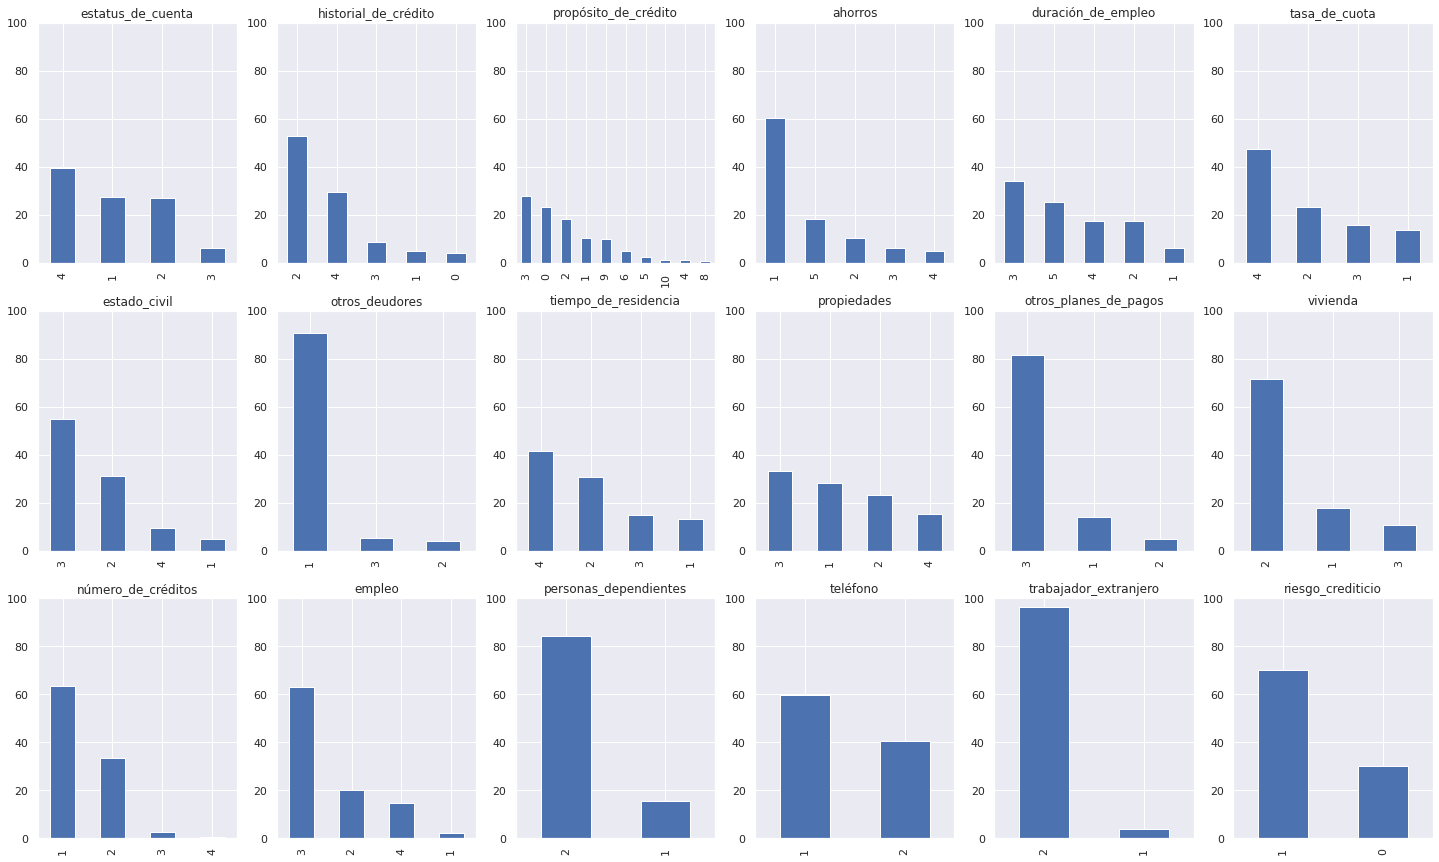

In [31]:
# Visualizamos la frecuencia de las clases.
var_categoricas = ['estatus_de_cuenta', 'historial_de_crédito', 'propósito_de_crédito',
                   'ahorros', 'duración_de_empleo', 'tasa_de_cuota', 'estado_civil', 
                   'otros_deudores', 'tiempo_de_residencia', 'propiedades' , 
                   'otros_planes_de_pagos', 'vivienda',  'número_de_créditos', 'empleo', 
                   'personas_dependientes', 'teléfono', 'trabajador_extranjero', 'riesgo_crediticio']
frecuencias = pd.DataFrame()
sns.set(rc={'figure.figsize':(25,15)})              # (ancho-columnas, altura-renglones) Ajustemos el tamaño de la ventana usando seaborn.
fig, axes = plt.subplots(3, 6)                      # Definimos una ventana de 3x3 nichos para incluir en cada uno de ellos un gráfico.
k = 1                                               # Inicializamos el contador de la posición del nicho
print('Gráficos de barras con porcentajes de respuestas por clase')
for name in var_categoricas:
  frecuencias['frecuencia'] = pd.value_counts(df[name])
  frecuencias['%'] = frecuencias.frecuencia * 100 / frecuencias.frecuencia.sum()
  # print('Frecuencia de \"',name,'\":\n',frecuencias,'\n - - - - - - - - - - - - - - - - - - \n')
  plt.subplot(3,6,k)
  plt.ylim(0,100)                               # Los nichos para cada histograma se numeran iniciando en 1.
  frecuencias['%'].plot( kind= 'bar', title= name)
  k = k + 1
  frecuencias = pd.DataFrame()
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

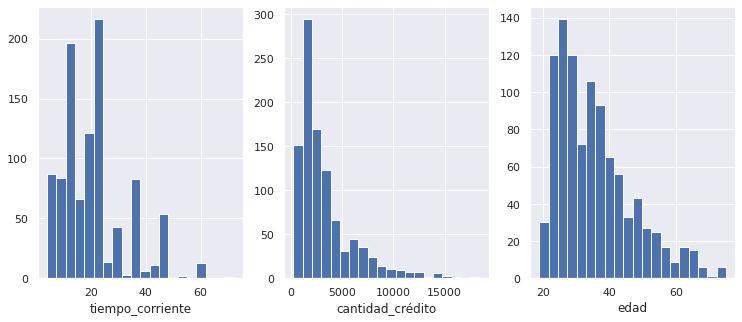

In [32]:
# Visualizando los histogramas de las variables númericas.
sns.set(rc={'figure.figsize':(12.5,5)})   # (ancho-columnas, altura-renglones) Ajustemos el tamaño de la ventana 
                                        # que desplegará los gráficos usando la librería de seaborn (sns).
fig, axes = plt.subplots(1, 3)          # Definimos una ventana de 3x3 nichos para incluir en cada uno de ellos un gráfico.
var_numéricas = ['tiempo_corriente', 'cantidad_crédito', 'edad']
k = 1
for name in var_numéricas:
  plt.subplot(1,3,k)                  # Los nichos para cada histograma se numeran iniciando en 1.
  plt.hist(df[name], bins=20)     # datatrain.columns nos devuelve una lista con los nombres de las columnas.
  plt.xlabel(name)
  k = k +1
plt.show()

Gráficos de barras con porcentajes de respuestas de la variable de salid


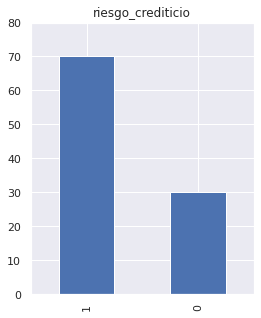

In [33]:
# Visualizamos la frecuencia de la variable de respuesta.

frecuencias = pd.DataFrame()
sns.set(rc={'figure.figsize':(4,5)})                # (ancho-columnas, altura-renglones) Ajustemos el tamaño de la ventana usando seaborn.
fig, axes = plt.subplots(1, 1)                      # Definimos una ventana de 3x3 nichos para incluir en cada uno de ellos un gráfico.
k = 1                                               # Inicializamos el contador de la posición del nicho
print('Gráficos de barras con porcentajes de respuestas de la variable de salid')

frecuencias['frecuencia'] = pd.value_counts(df['riesgo_crediticio'])
frecuencias['%'] = frecuencias.frecuencia * 100 / frecuencias.frecuencia.sum()
plt.subplot(1,1,k)
plt.ylim(0,80)                                     # Los nichos para cada histograma se numeran iniciando en 1.
frecuencias['%'].plot( kind= 'bar', title= 'riesgo_crediticio')


#**Ejercicio-2.**

2. Realiza una partición de los datos en el conjunto de entrenamiento del 85% y el de prueba de 15%. Los modelos se estarán entrenando con el método de validación cruzada, así que no es necesario en este paso generar el conjunto de validación. Define como la variable X a todas las
variables de entrada y a la variable Y como la variable de salida.

In [34]:
# Dividiendo los conjuntos de entrenamiento-validación y prueba

X = df.drop(['riesgo_crediticio'], axis=1)
Y = df['riesgo_crediticio']
Y.column = ['riesgo_crediticio']
print('Data frame X:\n',X.head(2))
print('\n- - - - - - - - - - - - - - - - - - - - - - - - - - -  \n Data frame y:\n',Y.head(2))

# Se utiliza la función train_test_split de scikit-learn para obtener una partición
# del 85% como conjunto de entrenamiento-validación y 15% para el conjunto de prueba. 
# Se utiliza además una semilla igual a 7.
Xtv, Xtest, Ytv, Ytest = train_test_split(X, Y, train_size= 0.85, random_state= 10)
print('\n- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - ')
print('Tamaño data frame entrenamiento-validación Xtv:',len(Xtv))
print('Tamaño data frame prueba Xtest:',len(Xtest))
print('Tamaño data frame entrenamiento-validación ytv:',len(Ytv))
print('Tamaño data frame prueba ytest:',len(Ytest))
# Invirtiendo la salida para que se corresponda con la variable de interes riesgp créditicio malo 
Ytv_inv = (Ytv - 1) * (-1)
Ytest_inv = (Ytest - 1) * (-1)
#print('Ytv:\n',Ytv)
#print('Ytv_inv:\n',Ytv_inv)

Data frame X:
    estatus_de_cuenta  tiempo_corriente  historial_de_crédito  \
0                  1                18                     4   
1                  1                 9                     4   

   propósito_de_crédito  cantidad_crédito  ahorros  duración_de_empleo  \
0                     2              1049        1                   2   
1                     0              2799        1                   3   

   tasa_de_cuota  estado_civil  otros_deudores  tiempo_de_residencia  \
0              4             2               1                     4   
1              2             3               1                     2   

   propiedades  edad  otros_planes_de_pagos  vivienda  número_de_créditos  \
0            2    21                      3         1                   1   
1            1    36                      3         1                   2   

   empleo  personas_dependientes  teléfono  trabajador_extranjero  
0       3                      2         1          

#**Ejercicio-3.**

3. Como una primera aproximación (baseline) realizarás las siguientes transformaciones mínimas para generar los primeros modelos. En la misma página de la UCI se indica el tipo de variable de cada uno de los factores. Definen cuatro tipo de variables: categórica (categorical), ordinal (discretized quantitative), numérica (quantitative) y binaria (binary). Con base a dicha
información realiza un Pipeline que incluya al menos las siguientes transformaciones:
* a. Imputación a todas las variables de entrada, diferenciando entre el tipo de cada variable (decide y justifica que tipo de imputación realizas en cada caso).
* b. Realiza un análisis de las variables numéricas (quantitative) de entrada y aplica una transformación que escale a todas ellas en un rango equiparable.
* c. Aplica la transformación One-Hot encoding a las variables de entrada de tipo categórico y binaria. En particular, justifica por qué una variable binaria requeriría que se le aplique la transformación one-hot encoding. Por el momento dejar las variables ordinales sin transformar.

In [58]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# 3 Transformaciones mínimas para generar los primeros modelos.

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Identificación de variables.
cate_pipeline_nom = ['estatus_de_cuenta', 'historial_de_crédito', 'propósito_de_crédito',
                     'ahorros', 'estado_civil', 'otros_deudores', 'otros_planes_de_pagos',
                     'vivienda']

ordi_pipeline_nom = ['duración_de_empleo', 'tasa_de_cuota', 'tiempo_de_residencia', 
                     'propiedades', 'número_de_créditos', 'empleo' ]

cuan_pipeline_nom = ['tiempo_corriente', 'cantidad_crédito', 'edad']

bina_pipeline_nom = ['personas_dependientes', 'teléfono', 'trabajador_extranjero']

cabi_pipeline_nombres = ['estatus_de_cuenta', 'historial_de_crédito', 'propósito_de_crédito',
                     'ahorros', 'estado_civil', 'otros_deudores', 'otros_planes_de_pagos',
                     'vivienda', 'personas_dependientes', 'teléfono', 'trabajador_extranjero']
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# 3a.imputación

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Transformaciones a factores categóricos de entrada:
cate_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])  
ordi_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])
bina_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])
cuan_pipeline = Pipeline(steps= [('imp_mediana', SimpleImputer(strategy='median'))])

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# 3b. Transformación de escala a variables númericas

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
#cuan_pipeline_norm = Pipeline(steps= [('norm_z_score', StandardScaler(copy=False)),
#                                      ('log', FunctionTransformer(np.log))])
#cuan_pipeline_norm = Pipeline(steps= [('escalaNum', MinMaxScaler(feature_range=(1,2))),
#                                      ('sqrt', FunctionTransformer(np.sqrt))])
cuan_pipeline_norm = Pipeline(steps= [('escalaNum', MinMaxScaler(feature_range=(1,2))) ])
''' - - - - - - - - - - COLOCAR SUTENTO - - - - - - - - - - '''

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# 3c. Transformación One-Hot encoding

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
cabi_pipeline = Pipeline(steps = [('OneHotE', OneHotEncoder(drop='first'))])

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Juntando todas las transformaciones
all_cate_pipeline = Pipeline(steps= [('impModa', SimpleImputer(strategy='most_frequent')),('OneHotE', OneHotEncoder(handle_unknown="ignore", drop='first'))])
all_ordi_pipeline = Pipeline(steps= [('impModa', SimpleImputer(strategy='most_frequent'))])
all_bina_pipeline = Pipeline(steps= [('impModa', SimpleImputer(strategy='most_frequent')),('OneHotE', OneHotEncoder(handle_unknown="ignore", drop='first'))])
all_cuan_pipeline = Pipeline(steps= [('impMean', SimpleImputer(strategy='median')), ('scalar', MinMaxScaler(feature_range=(1,2)))])
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Conjuntamos las transformaciones numéricas y categóricas que se estarán aplicando a los datos de entrada:
col_transf = ColumnTransformer(transformers = [('all_cuanpipe', all_cuan_pipeline, cuan_pipeline_nom),
                                               ('all_catepipe', all_cate_pipeline, cate_pipeline_nom),
                                               ('all_binapipe', all_bina_pipeline, bina_pipeline_nom),
                                               ('all_ordipipe', all_ordi_pipeline, ordi_pipeline_nom)],remainder='passthrough')

In [59]:
# Comprobando el nuevo dataframe creado con las transformaciones realizadas

print('Xx:\n',Xx_fit)
dfXx_fit_tra = pd.DataFrame(Xx_fit.transform(Xtv))
print('Data frame dfXx_fit_tra:\n',dfXx_fit_tra)

Xx:
 ColumnTransformer(remainder='passthrough',
                  transformers=[('all_cuanpipe',
                                 Pipeline(steps=[('impMean',
                                                  SimpleImputer(strategy='median')),
                                                 ('scalar',
                                                  MinMaxScaler(feature_range=(1,
                                                                              2)))]),
                                 ['tiempo_corriente', 'cantidad_crédito',
                                  'edad']),
                                ('all_catepipe',
                                 Pipeline(steps=[('impModa',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('OneHotE',
                                                  OneHotEncoder(handle_unknow...
                                                  SimpleImputer(stra

dfXx_cuan:
      tiempo_corriente  cantidad_crédito      edad
0            1.117647          1.048232  1.053571
1            1.294118          1.095381  1.089286
2            1.117647          1.034724  1.607143
3            1.470588          1.154253  1.553571
4            1.470588          1.502262  1.196429
..                ...               ...       ...
845          1.088235          1.085824  1.375000
846          1.117647          1.170755  1.142857
847          1.294118          1.130806  1.464286
848          1.294118          1.309207  1.500000
849          1.264706          1.154508  1.375000

[850 rows x 3 columns]


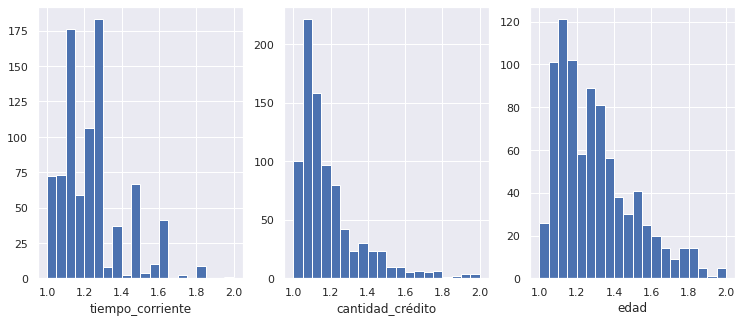

In [60]:
# Graficando la normalización en las variables númericas.

dfXx_cuan = pd.DataFrame({'tiempo_corriente': dfXx_fit_tra[0],
                          'cantidad_crédito': dfXx_fit_tra[1],
                          'edad': dfXx_fit_tra[2]})

print('dfXx_cuan:\n',dfXx_cuan)

# Visualizando los histogramas de las variables númericas.
sns.set(rc={'figure.figsize':(12.5,5)}) # (ancho-columnas, altura-renglones) Ajustemos el tamaño de la ventana 
                                        # que desplegará los gráficos usando la librería de seaborn (sns).
fig, axes = plt.subplots(1, 3)          # Definimos una ventana de 3x3 nichos para incluir en cada uno de ellos un gráfico.
var_numéricas = ['tiempo_corriente', 'cantidad_crédito', 'edad']
k = 1
for name in var_numéricas:
  plt.subplot(1,3,k)                    # Los nichos para cada histograma se numeran iniciando en 1.
  plt.hist(dfXx_cuan[name], bins=20)    # datatrain.columns nos devuelve una lista con los nombres de las columnas.
  plt.xlabel(name)
  k = k + 1
plt.show()


#**Ejercicio-4.**

4. Llevarás un entrenamiento usando validación cruzada entre los siguientes tres modelos de aprendizaje automático: Regresión Logística, Árbol de Decisión y Bosque Aleatorio. Deberás llevar a cabo el entrenamiento de los tres de manera conjunta usando un ciclo FOR. Recuerda aplicar las transformaciones que definiste en tu Pipeline. El entrenamiento debe ser con las
siguientes características:
* a. Usa los parámetros predeterminados de cada modelo.
* b. En cada iteración deben calcularse todas las siguientes métricas: accuracy, precision, recall, f1-score y Gmean. Todas estas métricas deben ser funciones que tú mismo debes definir (Es decir, no usar las funciones de dichas métricas que te proporciona scikit-learn.
Sin embargo, sí puedes usar la información regresada por el método confusion_matrix() de scikit-learn para definir las métricas).
* c. Usar validación cruzada estratificada con 5 particiones y con 3 repeticiones.
* d. Imprimir el valor de todas estas métricas, tanto para los datos de entrenamiento, como para los de validación. Así como los diagramas de caja y bigotes de los tres modelos con la métrica “recall”. ¿Alguno de los modelos está subentrenado o sobreentrenado? Justifica tu
respuesta.
* e. En particular obtengamos algunas de las llamadas curvas de aprendizaje para algunos de estos casos. En dada gráfico debes incluir tus comentarios sobre el modelo generado:
* + i. Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando el tamaño de la muestra para el modelo de regresión Logística con su hiperparámetros predeterminados. Utilizar al menos 20 puntos en la partición de los conjuntos de entrenamiento y la métrica “f1-score”, como evaluación del
desempeño de dicha función “learning_curve()”.
* + ii. Obtener las curvas de validación (validation_curve) en la cual se va incrementando la complejidad del hiperparámetro “max_depth” para el modelo de árbol de decisión con sus hiperparámetros predeterminados. Utilizar valores de máxima profundidad desde 1 hasta 20 y con la métrica “f1-score” para la evaluación del desempeño del modelo.
* + iii. Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando el tamaño de la muestra para el modelo de regresión bosque aleatorio (random forest) con su hiperparámetros predeterminados. Utilizar al menos 20 puntos en la partición de los conjuntos de entrenamiento y la métrica “recall”, como evaluación del desempeño del modelo.


 - - - - - - - - - - - - - - - - - - - - - - - - - - - -

Modelo a entrenar con cross_validation: LogisticRegression(solver='liblinear') 


 - - - - - - - - - - - - - - - - - - - - - - - - - - - -

Resultados del modelo "LogisticRegression(solver='liblinear')" entrenado.

Entrenamiento -  accuracy mean:0.79  ,  std:0.02
Validación    -  accuracy mean:0.758  ,  std:0.008
Entrenamiento - precision mean:0.816  ,  std:0.006
Validación    - precision mean:0.797  ,  std:0.021
Entrenamiento -    recall mean:0.908  ,  std:0.008
Validación    -    recall mean:0.884  ,  std:0.026
Entrenamiento -   f1score mean:0.86  ,  std:0.005
Validación    -   f1score mean:0.838  ,  std:0.013
Entrenamiento -     gmean mean:0.676  ,  std:0.014
Validación    -     gmean mean:0.629  ,  std:0.053
Etiquetas: Train-LR 

Etiquetas: Test-LR 


 - - - - - - - - - - - - - - - - - - - - - - - - - - - -

Modelo a entrenar con cross_validation: DecisionTreeClassifier() 


 - - - - - - - - - - - - - - - - - - - - - - - - 

' - - - - - - - - - - COLOCAR SUTENTO - - - - - - - - - - '

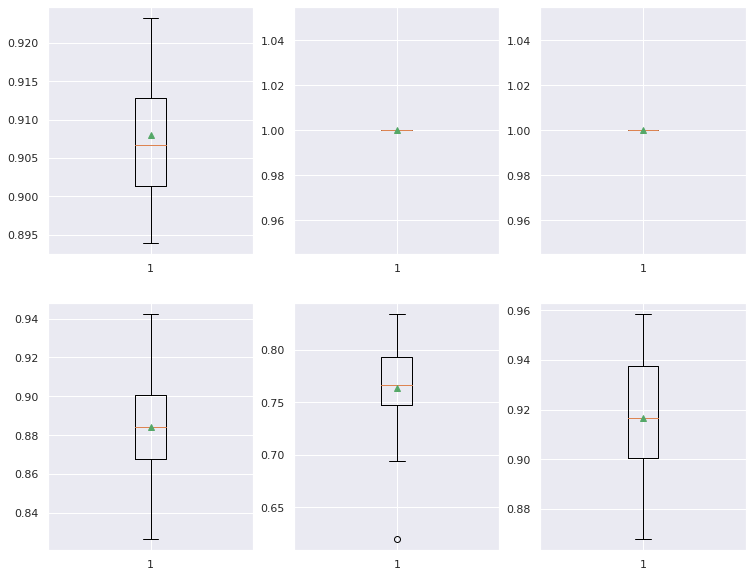

In [110]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# 4. Entrenando el modelo basado en: Regresión Logística, Árbol de Decisión y Bosque Aleatorio.

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# 4a. Estableciendo los parametros x default de Regresión Logística, Árbol de Decisión y Bosque Aleatorio.

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
modelos = []
modelos.append(('LogisticRegression', LogisticRegression(solver='liblinear')))
modelos.append(('DecisionTreeClassi', DecisionTreeClassifier()))
modelos.append(('RandomForestClassi', RandomForestClassifier()))

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# 4b. Calcular las métricas: accuracy, precision, recall, f1-score y Gmean

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
def exactitud_(Yreal, Ypred):
  vn, fp, fn, vp = confusion_matrix(Yreal, Ypred).ravel() 
  exactitud = (vp + vn) / (vp + vn + fp + fn) 
  return exactitud

def precision_(Yreal, Ypred):
  vn, fp, fn, vp = confusion_matrix(Yreal, Ypred).ravel() 
  precision = vp / (vp + fp) 
  return precision

def recall_(Yreal, Ypred):
  vn, fp, fn, vp = confusion_matrix(Yreal, Ypred).ravel() 
  recall = vp / (vp + fn) 
  return recall

def f1_score_(Yreal, Ypred):
  vn, fp, fn, vp = confusion_matrix(Yreal, Ypred).ravel() 
  f1_score = 2*vp / ((2*vp) + fp +fn)
  return f1_score

def Gmean_(Yreal, Ypred):
  vn, fp, fn, vp = confusion_matrix(Yreal, Ypred).ravel() 
  Gmean = np.sqrt( (vp / (vp + fn)) * vn / (vn + fp)) 
  return Gmean

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# 4c. Definimos la validación cruzada estratificada con 5 particiones y con 3 repeticiones

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=7)
resultados = list()
mis_metricas = {'accuracy': make_scorer(exactitud_),
                'precision': make_scorer(precision_),
                'recall': make_scorer(recall_),
                'f1score': make_scorer(f1_score_),
                'gmean': make_scorer(Gmean_)}
k= 0
sns.set(rc={'figure.figsize':(12.5,10)})
fig, axes = plt.subplots(2, 3)

for name, model in modelos:       # entrenando al modelo seleccionado y obteniendo sus predicciones.
  print('\n - - - - - - - - - - - - - - - - - - - - - - - - - - - -\n')
  print('Modelo a entrenar con cross_validation: %s' % model,'\n')
  pipeline = Pipeline( steps=[('transforma_columnas', col_transf), ('modelos_a_probar', model)])
  scores = cross_validate(pipeline, Xtv, Ytv, scoring= mis_metricas, cv= kfold, return_train_score= True)
  resultados.append(scores)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# 4d. Visualizando las métricas con los datos de entrenamiento y validación.
#     Visualizando los diagramas de caja y bigotes de los tres modelos con la métrica “recall”.

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

# Imprimiendo resultados
  print('\n - - - - - - - - - - - - - - - - - - - - - - - - - - - -\n')
  print('Resultados del modelo "%s"' % model,'entrenado.\n')
  print('Entrenamiento -  accuracy mean:%s  ,  std:%s' %(round(np.mean(resultados[(k)]['train_accuracy']),3), round(np.std(resultados[(0)]['test_accuracy']),3)))
  print('Validación    -  accuracy mean:%s  ,  std:%s' %(round(np.mean(resultados[(k)]['test_accuracy']),3), round(np.std(resultados[(0)]['train_accuracy']),3)))
  
  print('Entrenamiento - precision mean:%s  ,  std:%s' %(round(np.mean(resultados[(k)]['train_precision']),3), round(np.std(resultados[(0)]['train_precision']),3)))
  print('Validación    - precision mean:%s  ,  std:%s' %(round(np.mean(resultados[(k)]['test_precision']),3), round(np.std(resultados[(0)]['test_precision']),3)))
  
  print('Entrenamiento -    recall mean:%s  ,  std:%s' %(round(np.mean(resultados[(k)]['train_recall']),3), round(np.std(resultados[(0)]['train_recall']),3)))
  print('Validación    -    recall mean:%s  ,  std:%s' %(round(np.mean(resultados[(k)]['test_recall']),3), round(np.std(resultados[(0)]['test_recall']),3)))
  
  print('Entrenamiento -   f1score mean:%s  ,  std:%s' %(round(np.mean(resultados[(k)]['train_f1score']),3), round(np.std(resultados[(0)]['train_f1score']),3)))
  print('Validación    -   f1score mean:%s  ,  std:%s' %(round(np.mean(resultados[(k)]['test_f1score']),3), round(np.std(resultados[(0)]['test_f1score']),3)))
  
  print('Entrenamiento -     gmean mean:%s  ,  std:%s' %(round(np.mean(resultados[(k)]['train_gmean']),3), round(np.std(resultados[(0)]['train_gmean']),3)))
  print('Validación    -     gmean mean:%s  ,  std:%s' %(round(np.mean(resultados[(k)]['test_gmean']),3), round(np.std(resultados[(0)]['test_gmean']),3)))

  # Visualizando los boxplot de los 3 modelos con la métrica "recall"
  etiquetas_bp1 = ['Train-LR', 'Train-DT', 'Train-RF']
  etiquetas_bp2 = ['Test-LR', 'Test-DT', 'Test-RF']
  print('Etiquetas:',etiquetas_bp1[k],'\n')
  print('Etiquetas:',etiquetas_bp2[(k)],'\n')
  plt.subplot(2,3,k+1)
  boxplot_data1 = resultados[(k)]['train_recall'] # print('\nboxplot data:\n',boxplot_data)
  plt.boxplot(boxplot_data1, showmeans= True)
  plt.subplot(2,3,k+4)
  boxplot_data2 = resultados[(k)]['test_recall'] # print('\nboxplot data:\n',boxplot_data)
  plt.boxplot(boxplot_data2, showmeans= True)

  # Aumentando índice
  k = k + 1

#    Responde: ¿Alguno de los modelos está subentrenado o sobreentrenado?
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
''' - - - - - - - - - - COLOCAR SUTENTO - - - - - - - - - - '''

In [92]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# 4. Obteniendo curvas de aprendizaje:

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
def mi_LearningCurvePlot_(train_sizes, train_scores, val_scores):

# Argumentos de entrada de la función mi_LearningCurvePlot:
    #      train_sizes : número de observaciones en el conjunto de entrenamiento.
    #     train_scores : Exactitud de cada partición en el proceso de Validación-Cruzada (VC) en los datos de entrenamiento.
    #                    La dimensión de este conjunto es (pxq) 
    #                    donde p="número de particiones de manera incremental del conjunto de entrenamiento".
    #                    q="número de particiones de VC" * "número de repeticiones de VC con RepitedStratifiedCV"
    #       val_scores : Exactitud de cada partición en el proceso de Validación-Cruzada en los datos de validación.
    #                    Es de la misma dimensión que los train_scores. 
    #            Output: la salida es el gráfico con las curvas de aprendizaje.

    # Obtenemos los promedios y desviaciones estándar de cada renglón de los resultados de entrenamiento y validación
    # La dimensión de cada uno es p="número de particiones de manera incremental del conjunto de entrenamiento".
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(8,6))
    plt.plot(train_sizes, train_mean, color='green', marker='o', markersize=7, label='Entrenamiento')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.2, color='green')
    
    plt.plot(train_sizes, val_mean, color='brown', marker='*', markersize=7, linestyle='--', label='Validación')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.2, color='brown')
    
    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel('Exactitud (accuracy)')
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

In [86]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# 4e. En particular obtengamos algunas de las llamadas curvas de aprendizaje para algunos de estos casos.
#     En dada gráfico debes incluir tus comentarios sobre el modelo generado:
#      i. Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando el tamaño de 
#         la muestra para el modelo de regresión Logística con sus hiperparámetros predeterminados. 
#         Utilizar al menos 20 puntos en la partición de los conjuntos de entrenamiento y la métrica “f1-score”, 
#         como evaluación del desempeño de dicha función “learning_curve()”.

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
def ei_mi_ModeloYCurvas(Xin): # Usemos primeramente el modelo de regresión logística con sus parámetros predeterminados y semilla igual a 1.

  mi_modelo_ = LogisticRegression(max_iter=2500, random_state=1) #LogisticRegression(solver='liblinear') #LogisticRegression(max_iter=1000, random_state=1)

  # Se define el pipeline con dos pasos: primero la limpieza y normalización utilizando el pipeline definido anteriormente "columnasTransformer" 
  pipeline = Pipeline( steps= [('transforma_columnas', col_transf), ('modelo_a_probar', mi_modelo_)])
  # A continuación se aplicará la validación cruzada para el caso estratificado y con repeticiones, con la función RepeatedStratifiedKFold().
  # La estratificación es para obtener una distribución de clases homogénea en cada partición de VC y las repeticiones son para obtener 
  # un modelo más robusto. Se utilizan 5 particiones (splits) y 3 repeticiones, con una semilla igual a 7. 
  kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)
  delta_train_sz = np.linspace(0.1,1,40) # Arreglo con los 40 pasos de los tamaños que definiran los conjuntos de entrenamiento de manera incremental


  # Agregando los argumentos de la función learning_curve de scikit-learn que permiten generar los resultados de 
  # los conjuntos de entrenamiento y validación necesarios para generar las curvas de aprendizaje.

  tr_sizes, tr_scores, val_scores = learning_curve(estimator= pipeline,    
                                                   X= Xin,
                                                   y= Ytv,
                                                   cv= kfold,
                                                   train_sizes= delta_train_sz,
                                                   random_state= 10,
                                                   scoring= make_scorer(f1_score_),
                                                   n_jobs= -1)

  mi_LearningCurvePlot_(tr_sizes, tr_scores, val_scores) # Obteniendo el gráfico con las curvas de aprendizaje:

Curvas de aprendizaje del modelo lineal:


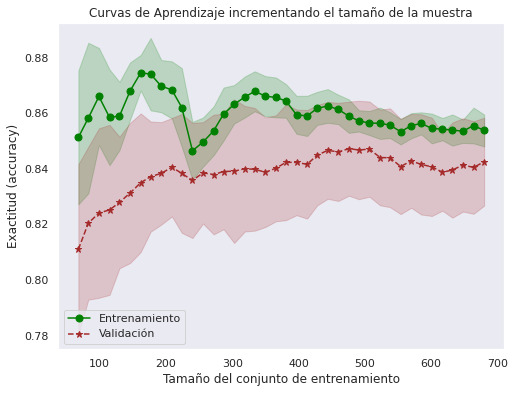

' - - - - - - - - - - COMENTARIOS - - - - - - - - - - '

In [87]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
print('Curvas de aprendizaje del modelo lineal:')
ei_mi_ModeloYCurvas(Xtv)
''' - - - - - - - - - - COLOCAR COMENTARIOS - - - - - - - - - - '''

In [84]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# 4e. En particular obtengamos algunas de las llamadas curvas de aprendizaje para algunos de estos casos.
#     En dada gráfico debes incluir tus comentarios sobre el modelo generado:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
#     ii. Obtener las curvas de validación (validation_curve) en la cual se va incrementando la complejidad del
#         hiperparámetro “max_depth” para el modelo de árbol de decisión con sus hiperparámetros predeterminados. 
#         Utilizar valores de máxima profundidad desde 1 hasta 20 y con la métrica “f1-score” para la evaluación 
#         del desempeño del modelo.

modelo_lc = DecisionTreeClassifier() #modelos.append(('RandomForestClassi', RandomForestClassifier()))

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
def mi_ValCur_ModeloYCurvas(Xin, Yin, mi_modelo): # Usemos primeramente el modelo de regresión logística con sus parámetros predeterminados y semilla igual a 1.

  modelo_lc = DecisionTreeClassifier()
  # Se define el pipeline con dos pasos: primero la limpieza y normalización utilizando el pipeline definido anteriormente "columnasTransformer" 
  pipeline = Pipeline( steps= [('transforma_columnas', col_transf), ('modelo_a_probar', modelo_lc)])
  # A continuación se aplicará la validación cruzada para el caso estratificado y con repeticiones, con la función RepeatedStratifiedKFold().
  # La estratificación es para obtener una distribución de clases homogénea en cada partición de VC y las repeticiones son para obtener 
  # un modelo más robusto. Se utilizan 5 particiones (splits) y 3 repeticiones, con una semilla igual a 7. 
  val_max_depth = np.linspace(1,20,20)

  # Agregando los argumentos de la función validation_curve de scikit-learn que permiten generar los resultados de 
  # los conjuntos de entrenamiento y validación necesarios para generar las curvas de aprendizaje.
  param_name = "max_depth"
  tr_sizes = val_max_depth
  tr_scores, val_scores = validation_curve(estimator= pipeline,    
                                           X= Xin,
                                           y= Yin,
                                           param_name= f"modelo_a_probar__{param_name}",
                                           param_range= val_max_depth,
                                           cv= kfold,
                                           scoring= make_scorer(f1_score_),
                                           n_jobs= -1)

  mi_LearningCurvePlot_(tr_sizes, tr_scores, val_scores) # Obteniendo el gráfico con las curvas de aprendizaje:

Curvas de aprendizaje del modelo lineal:


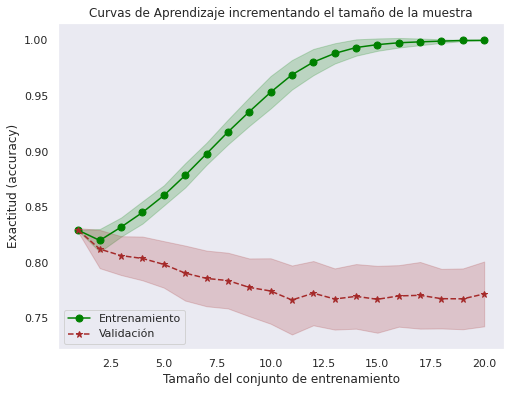

In [85]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
print('Curvas de aprendizaje del modelo lineal:')
mi_ValCur_ModeloYCurvas(Xtv, Ytv, modelo_lc)
''' - - - - - - - - - - COLOCAR COMENTARIOS - - - - - - - - - - '''

In [88]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# 4e. En particular obtengamos algunas de las llamadas curvas de aprendizaje para algunos de estos casos.
#     En dada gráfico debes incluir tus comentarios sobre el modelo generado:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
#     iii. Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando el tamaño de la
#          muestra para el modelo de regresión bosque aleatorio (random forest) con su hiperparámetros predeterminados. 
#          Utilizar al menos 20 puntos en la partición de los conjuntos de entrenamiento y la métrica “recall”, 
#          como evaluación del desempeño del modelo.

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
def ei_mi_ModeloYCurvas(Xin, Yin): # Usemos primeramente el modelo de regresión logística con sus parámetros predeterminados y semilla igual a 1.

  mi_modelo_ = RandomForestClassifier()

  # Se define el pipeline con dos pasos: primero la limpieza y normalización utilizando el pipeline definido anteriormente "columnasTransformer" 
  pipeline = Pipeline( steps= [('transforma_columnas', col_transf), ('modelo_a_probar', mi_modelo_)])
  # A continuación se aplicará la validación cruzada para el caso estratificado y con repeticiones, con la función RepeatedStratifiedKFold().
  # La estratificación es para obtener una distribución de clases homogénea en cada partición de VC y las repeticiones son para obtener 
  # un modelo más robusto. Se utilizan 5 particiones (splits) y 3 repeticiones, con una semilla igual a 7. 
  kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)
  delta_train_sz = np.linspace(0.1,1,20) # Arreglo con los 20 pasos de los tamaños que definiran los conjuntos de entrenamiento de manera incremental


  # Agregando los argumentos de la función learning_curve de scikit-learn que permiten generar los resultados de 
  # los conjuntos de entrenamiento y validación necesarios para generar las curvas de aprendizaje.

  tr_sizes, tr_scores, val_scores = learning_curve(estimator= pipeline,    
                                                   X= Xin,
                                                   y= Yin,
                                                   cv= kfold,
                                                   train_sizes= delta_train_sz,
                                                   random_state= 10,
                                                   scoring= make_scorer(recall_),
                                                   n_jobs= -1)

  mi_LearningCurvePlot_(tr_sizes, tr_scores, val_scores) # Obteniendo el gráfico con las curvas de aprendizaje:

# e.iii. Learning_curve con incrementos del tamaño de la muestra, con el modelo de bosque aleatorio utilizando al
#        menos 20 puntos en la partición del conjunto de entrenamiento y métrica "recall".


Curvas de aprendizaje del modelo lineal:


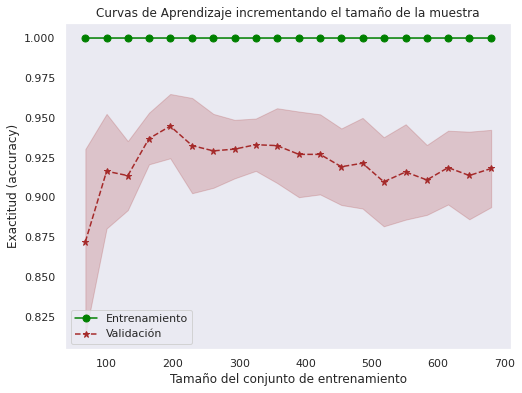

' - - - - - - - - - - COMENTARIOS - - - - - - - - - - '

In [89]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
print('Curvas de aprendizaje del modelo lineal:')
ei_mi_ModeloYCurvas(Xtv, Ytv)
''' - - - - - - - - - - COLOCAR COMENTARIOS - - - - - - - - - - '''

#**Ejercicio-5.**

5. Finalmente veamos la manera de mejorar los valores de los hiperparámetros de cada modelo, así como el problema del sobreentrenamiento de algunos de ellos. Para ello deberás usar el método GridSearchCV() de scikit-learn. Recuerda que este método hace una búsqueda de los mejores hiperparámetros de un modelo mediante el llamada formato de malla y aplicando validación cruzada. En cada caso puedes incrementar el máximo de iteraciones,”max_iter” para que tengas
la convergencia adecuada para todas las combinaciones en cada modelo. Recuerda también aplicar las transformaciones que definiste en tu Pipeline. Para fines de este ejercicio se ha seleccionado para cada modelo una métrica diferente, que permita irte familiarizando con ellas.
Puedes consultar su documentación de GridSearchCV en la siguiente liga:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
* a. Para el modelo de regresión logística realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: C, solver, class_weight y penalty. En este caso deberás usar la métrica (scoring) “f1-score”. Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica f1. ¿Cuál es la utilidad de la métrica “f1-score”? Incluye tus conclusiones.
NOTA: Toma en cuenta que no todas las combinaciones de “solver” y “penalty” son
posibles, para que lo tomes en cuenta al momento de realizar la búsqueda. Revisa la documentación.
* b. Con los mejores valores de los hiperparámetros encontrados con la métrica “f1-score” para el modelo de regresión logística, obtener las curvas de aprendizaje (learning curve),
incrementando el tamaño del conjunto de entrenamiento al menos 20 veces. Si lo crees adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y evitar el sobreentrenamiento o el subentrenamiento.
* c. Para el modelo de árbol de decisión (decision tree) realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth, min_samples_split y class_weight. En este caso deberás usar la métrica (scoring) “precision”. Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica “precision”. ¿Cuál es la utilidad de la métrica “precision”? Incluye tus conclusiones.
* d. Con los mejores valores de los hiperparámetros encontrados con la métrica “precision” para el modelo de árbol de decisión, obtener las curvas de aprendizaje (learning curve), incrementando el tamaño del conjunto de entrenamiento al menos 20 veces. Si lo crees adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y evitar el sobreentrenamiento o el subentrenamiento.
* e. Para el modelo de bosque aleatorio (random forest) realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth, min_samples_split y class_weight. En este caso deberás usar la métrica (scoring) “recall”. Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica “recall”. ¿Cuál es la utilidad de la métrica
“recall”? Incluye tus conclusiones. *NOTA: Toma en cuenta que el método de random forest pude tardar varios minutos en llevar a cabo.*
* f. Con los mejores valores de los hiperparámetros encontrados con la métrica “recall” para el modelo de bosque aleatorio, obtener las curvas de validación (validation curve), incrementando la complejidad del modelo a través del hiperparámetro “max_depth” con al menos 10 valores. Si lo crees adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y evitar el sobreentrenamiento o el subentrenamiento.

In [ ]:
None

#**Ejercicio-6.**

6. Para cada uno de estos tres modelos, con las métricas que se consideraron en cada caso y usando
el conjunto de Prueba que no has utilizado hasta ahora, obtener los modelos finales como se te
indica a continuación. Deberás usar además como conjunto de entrenamiento el llamado modelo
de entrenamiento “aumentado” que consiste en las datos que estuviste utilizando para
entrenamiento y validación:
* a. Obtener el modelo de regresión logística con los mejores parámetros que hayas
encontrado con la métrica f1-score utilizada. Imprimir el valor de dicha métrica e incluye
tus conclusiones finales para este caso. Incluir un gráfico del árbol de decisión final
obtenido.
* b. Obtener el modelo de árbol de decisiones con los mejores parámetros que hayas
encontrado con la métrica “precision” utilizada. Imprimir el valor de dicha métrica e
incluye tus conclusiones finales para este caso.
* c. Obtener el modelo de bosque aleatorio con los mejores parámetros que hayas
encontrado con la métrica “recall” utilizada. Imprimir el valor de dicha métrica e incluye
tus conclusiones finales para este caso.

In [ ]:
None

###**Fin de la Actividad de la semana 6.**